In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
# Preview first 5 rows of each
print("Matches Data:")
print(matches.head())

print("\nDeliveries Data:")
print(deliveries.head())

Matches Data:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers 

In [4]:
print("matches shape",matches.shape)
print("deliveries shape",deliveries.shape)

matches shape (756, 18)
deliveries shape (179078, 21)


In [5]:
# Check for missing values
print(matches.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [7]:
# Count matches per season
season_counts=matches['season'].value_counts().sort_index()

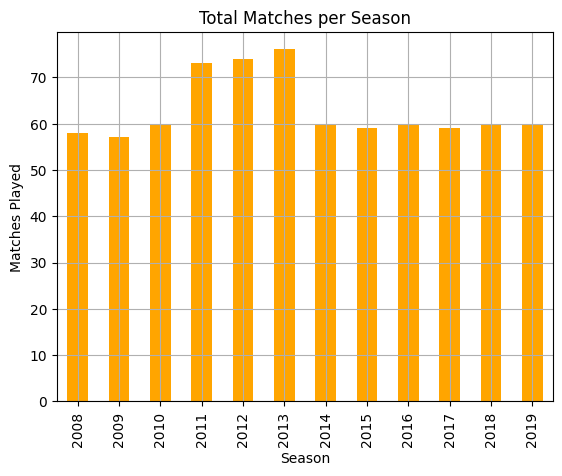

In [9]:
#plot
season_counts.plot(kind='bar', color='orange')
plt.title("Total Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches Played")
plt.grid(True)
plt.show()

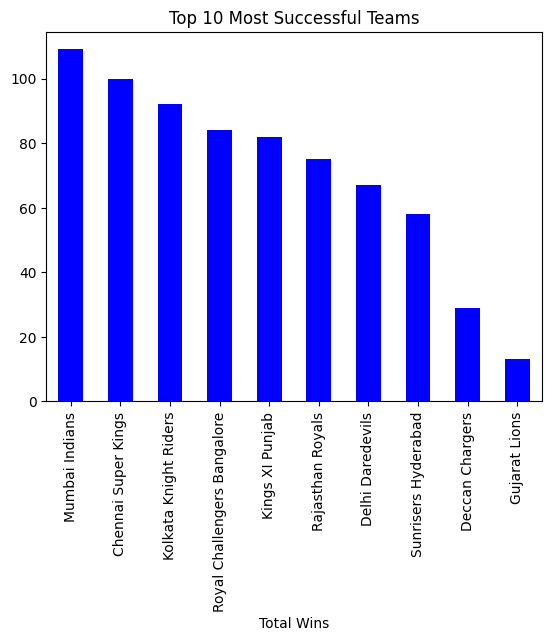

In [12]:
# Count of matches won by each team
most_wins=matches['winner'].value_counts().head(10)
most_wins.plot(kind='bar',color='blue')
plt.title("Top 10 Most Successful Teams")
plt.xlabel("Total Wins")
plt.show()

In [13]:
# How often toss winner also wins the match
toss_match_win = matches[matches['toss_winner'] == matches['winner']].shape[0]
total_matches = matches.shape[0]

print(f"Toss winner also won the match in {round(toss_match_win / total_matches * 100, 2)}% of the matches.")

Toss winner also won the match in 51.98% of the matches.


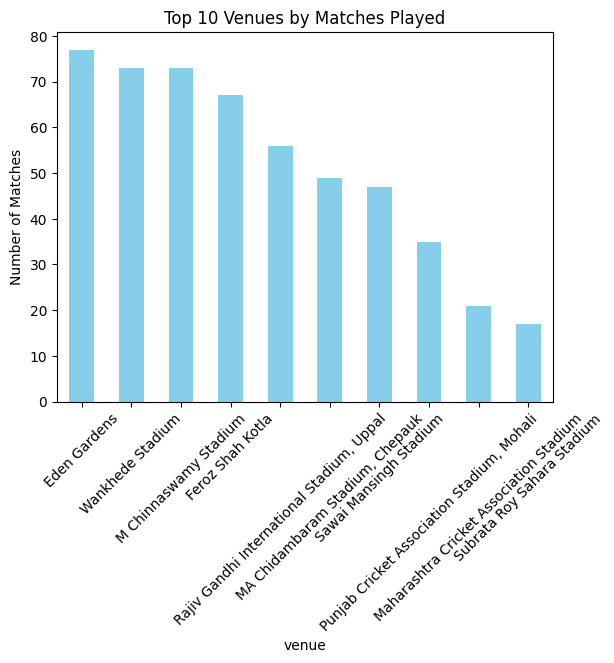

In [16]:
# Top 10 venues with most matches
top_venues = matches['venue'].value_counts().head(10)

# Plot
top_venues.plot(kind='bar', color='skyblue')
plt.title("Top 10 Venues by Matches Played")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

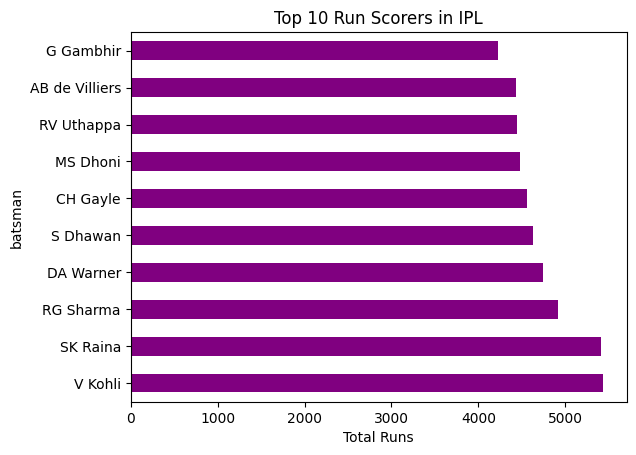

In [17]:
# Total runs by batsman
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plot
top_batsmen.plot(kind='barh', color='purple')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.show()

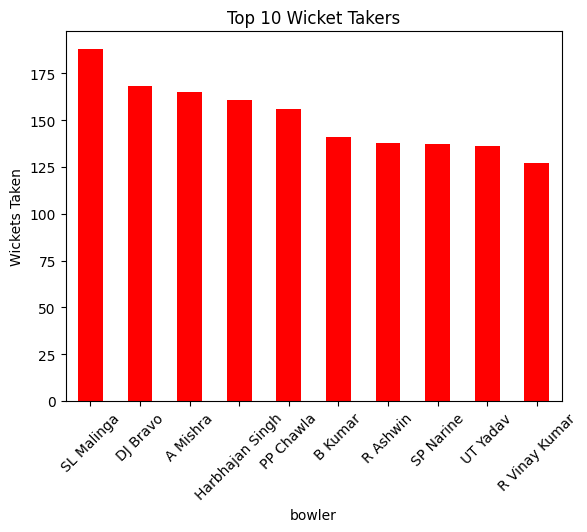

In [18]:
# Count wickets by bowler
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = wickets['bowler'].value_counts().head(10)

# Plot
top_bowlers.plot(kind='bar', color='red')
plt.title("Top 10 Wicket Takers")
plt.ylabel("Wickets Taken")
plt.xticks(rotation=45)
plt.show()